# **PRACTICA ML KC**
## **Estimacion de precio de un airbnb**
Basandonos en un dataset real de apartamentos en airbnb haremos un analisis exploratorio aplicando tecnicas de Machine Learning para asi poder lograr una prediccion de precio de un airbnb. Por lo cual nuestra variable objetivo sera el precio y teniendo esto de base usaremos herramientas como:
- Pandas
- numpy
- sklearn
- matplotlib

### **1. Carga de datos, limpieza de variables y division en train/test**

Cargamos los datos para poder revisar las vairables mas importantes que seran las que usaremos para el analisis.

In [2]:
# Importamos las librerias necesarias
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [16]:
airbnb_data = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';', encoding = "latin")
print(airbnb_data.shape)
airbnb_data.head(5).T 

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [10]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [21]:
columns_to_delete = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description','Experiences Offered',
                    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url',
                    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 
                    'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 
                    'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Market', 'Smart Location',
                    'Latitude', 'Longitude', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 
                    'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features' ]

El criterio usado para la eliminacion de variables puede ser subjetivo, pero en este caso se podrian sacar unos motivos definidos para su eliminacion, entre estos estan:

- Todas las columnas que contienen URl's.
- Campos descriptivos ya que buscamos obtener el precio de la manera mas objetivo y sumado a esto que el procesamiento de lenguaje natural tan extenso y elevado podria ser dificil.
- Informacion del host ya que esta no esta ligada directamente con la propiedad.
- Columnas con datos no muy relevantes o redundantes.
 
Por ahora todavia no se descartaran columnas por falta de datos.



In [22]:
airbnb_data_del = airbnb_data.drop(columns_to_delete, axis =1)

In [25]:
print("Dataset completo ",airbnb_data.shape)
print("Nuevo dataset filtrado ",airbnb_data_del.shape)

Dataset completo  (14780, 89)
Nuevo dataset filtrado  (14780, 39)


Antes de hacer la separacion en train y test es necesario eliminar los valores nulos de la variable objetivo ya que estos claramente son necesarios para el analisis y ademas para que la distribucion en train y test de los datos sea correcta

In [28]:
airbnb_data_del = airbnb_data_del[~airbnb_data_del['Price'].isnull()]
airbnb_data_del.shape

(14763, 39)

Ahora dividiremos en train y test usando El método train_test_split de sklearn. Dividiremos en una proporcion 70/30 ya que la cantidad de datos no es tan elevada(Si la cantidad de datos fuera mayor podriamos disminuir el % de test).

In [29]:
train, test = train_test_split(airbnb_data_del, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb_data_del_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb_data_del_test.csv', sep=';', decimal='.', index=False)


Dimensiones del dataset de training: (11810, 39)
Dimensiones del dataset de test: (2953, 39)


### Ahora cargamos el dataset de train y trabajaremos solo con el 

In [30]:
airbnb_data = pd.read_csv("./data/airbnb_data_del_train.csv", sep=';', encoding = "latin")
print(airbnb_data.shape)
airbnb_data.head(5).T 

(11810, 39)


,0,1,2,3,4
Neighbourhood,Villa de Vallecas,NaN,NaN,Gaztambide,Paddington
Neighbourhood Cleansed,Casco HistÃÂ³rico de Vallecas,Palacio,Aravaca,Gaztambide,Woollahra
Neighbourhood Group Cleansed,Villa de Vallecas,Centro,Moncloa - Aravaca,ChamberÃÂ­,NaN
City,Madrid,Madrid,Aravaca,Madrid,Paddington
State,Comunidad de Madrid,Comunidad de Madrid,Madrid,Comunidad de Madrid,NSW
Zipcode,28051,28005,28023,28003,2021
Country Code,ES,ES,ES,ES,AU
Country,Spain,Spain,Spain,Spain,Australia
Property Type,Apartment,Apartment,Apartment,Apartment,House
Room Type,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Private room


### **2. Analisis exploratorio**

Podemos analizar la estructura básica del dataset con las funciones de Pandas que ya conocemos: describe, dtypes, shape, etc.

In [31]:
airbnb_data.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,...,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,11810.000000,11767.000000,11794.000000,11774.000000,470.000000,11810.000000,2889.000000,2866.000000,5012.000000,6902.000000,...,11810.000000,11810.000000,11810.000000,9156.000000,9138.000000,9143.000000,9132.000000,9143.000000,9129.000000,9128.000000
mean,3.278069,1.285927,1.344328,2.047647,393.468085,73.970449,375.876082,1430.153524,188.587590,31.678934,...,39.929043,202.670872,22.673328,91.692988,9.416503,9.329542,9.625055,9.650334,9.537737,9.220640
std,2.106103,0.669079,0.903121,1.627982,622.031055,73.519884,194.099460,1256.968467,112.343611,29.920051,...,29.677101,127.830351,38.430648,8.951523,0.911829,0.988121,0.800708,0.763496,0.768381,0.943781
min,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,34.000000,220.000000,720.000000,100.000000,15.000000,...,12.000000,79.250000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,3.000000,1.000000,1.000000,2.000000,108.000000,55.000000,350.000000,1200.000000,150.000000,25.000000,...,38.000000,240.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,4.000000,1.000000,2.000000,2.000000,646.000000,86.000000,499.000000,1725.000000,200.000000,40.000000,...,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,16.000000,8.000000,10.000000,16.000000,6997.000000,999.000000,999.000000,25000.000000,950.000000,500.000000,...,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Al revisar la cuenta de datos se puede ver que en la columna *Square Feet* faltan muchos datos (470 de 11810)- Por lo cual revisaremos variable a variable la cantidad de datos nulos.

In [32]:
airbnb_data.isnull().sum()

Neighbourhood                    4190
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      818
City                                5
State                             106
Zipcode                           392
Country Code                        0
Country                             1
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          43
Bedrooms                           16
Beds                               36
Bed Type                            0
Amenities                         140
Square Feet                     11340
Price                               0
Weekly Price                     8921
Monthly Price                    8944
Security Deposit                 6798
Cleaning Fee                     4908
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Availability

Al ver la cantidad de nulos en cada variable podemos ver de cuales de estas precindir y cuales de estas podriamos simplemente imputar. 

Para este caso eliminaremos las columnas Neighbourhood, Square Feet, Weekly Prince, Monthly Price, Security Deposit, Cleaning Fee (Podriamos tambien eliminar las columnas de Review pero en este caso seria mejor simplemente borrar los datos nulos ya que esta columna puede ser de gran valor en el analisis) y para las demas columnas solo imputaremos sus datos dependiendo de si son variables numericas o si son tipo texto u objeto. 

In [33]:
airbnb_data.drop(columns= 'Neighbourhood', axis=1, inplace=True)
airbnb_data.drop(columns= 'Square Feet', axis=1, inplace=True)
airbnb_data.drop(columns= 'Weekly Price', axis=1, inplace=True)
airbnb_data.drop(columns= 'Monthly Price', axis=1, inplace=True)
airbnb_data.drop(columns= 'Security Deposit', axis=1, inplace=True)
airbnb_data.drop(columns= 'Cleaning Fee', axis=1, inplace=True)

KeyError: "['Neighbourhood'] not found in axis"

In [34]:
airbnb_data.dtypes

Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
State                            object
Zipcode                          object
Country Code                     object
Country                          object
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Amenities                        object
Price                           float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64
Availability 30                   int64
Availability 60                   int64
Availability 90                   int64
Availability 365                  int64
Number of Reviews                 int64


In [36]:
airbnb_data.select_dtypes(include=['float64', 'int64']).isnull().sum()

Accommodates                      0
Bathrooms                        43
Bedrooms                         16
Beds                             36
Price                             0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating           2654
Review Scores Accuracy         2672
Review Scores Cleanliness      2667
Review Scores Checkin          2678
Review Scores Communication    2667
Review Scores Location         2681
Review Scores Value            2682
dtype: int64

In [44]:
num_columns = airbnb_data.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    mean_value = airbnb_data[col].mean()
    airbnb_data[col].fillna(mean_value, inplace = True)

print(airbnb_data.select_dtypes(include=['float64', 'int64']).isnull().sum())

Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Price                          0
Guests Included                0
Extra People                   0
Minimum Nights                 0
Maximum Nights                 0
Availability 30                0
Availability 60                0
Availability 90                0
Availability 365               0
Number of Reviews              0
Review Scores Rating           0
Review Scores Accuracy         0
Review Scores Cleanliness      0
Review Scores Checkin          0
Review Scores Communication    0
Review Scores Location         0
Review Scores Value            0
dtype: int64


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_15312\3871958210.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data[col].fillna(mean_value, inplace = True)


In [45]:
airbnb_data.select_dtypes(include=['object']).isnull().sum()

Neighbourhood Cleansed            0
Neighbourhood Group Cleansed    818
City                              5
State                           106
Zipcode                         392
Country Code                      0
Country                           1
Property Type                     0
Room Type                         0
Bed Type                          0
Amenities                       140
Cancellation Policy               0
dtype: int64

Al ver los valores de las columnas de tipo object decidi no confundirme mucho con que hacer ya que al poner la moda puede generar problemas. Por lo cual las variables que tengan un valor muy bajo decidi eliminarlas del dataset y las de valores mal altos como ***Neighbourhood Group Cleansed*** decidi imputarlo y para el caso de zip code puede que no sea tan relevante a la hora de generar nuestro modelo entonces se va.

In [46]:
airbnb_data.drop('Zipcode', axis=1)



,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Country Code,Country,Property Type,Room Type,Accommodates,Bathrooms,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
0,Casco HistÃÂ³rico de Vallecas,Villa de Vallecas,Madrid,Comunidad de Madrid,ES,Spain,Apartment,Entire home/apt,2,1.0,...,0,3,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,moderate
1,Palacio,Centro,Madrid,Comunidad de Madrid,ES,Spain,Apartment,Entire home/apt,4,1.0,...,75,24,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,flexible
2,Aravaca,Moncloa - Aravaca,Aravaca,Madrid,ES,Spain,Apartment,Private room,1,1.0,...,365,2,90.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.00000,moderate
3,Gaztambide,ChamberÃÂ­,Madrid,Comunidad de Madrid,ES,Spain,Apartment,Entire home/apt,4,1.0,...,298,62,87.000000,9.000000,10.000000,9.000000,9.000000,9.000000,9.00000,moderate
4,Woollahra,NaN,Paddington,NSW,AU,Australia,House,Private room,1,1.0,...,365,24,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,TimÃÂ³n,Barajas,Madrid,Comunidad de Madrid,ES,Spain,Loft,Private room,2,1.0,...,363,0,91.692988,9.416503,9.329542,9.625055,9.650334,9.537737,9.22064,flexible
11806,Comillas,Carabanchel,Madrid,Comunidad de Madrid,ES,Spain,Apartment,Private room,1,1.0,...,28,0,91.692988,9.416503,9.329542,9.625055,9.650334,9.537737,9.22064,flexible
11807,Palacio,Centro,Madrid,Comunidad de Madrid,ES,Spain,Apartment,Entire home/apt,2,1.0,...,152,12,89.000000,9.000000,8.000000,10.000000,10.000000,10.000000,8.00000,strict
11808,Embajadores,Centro,Madrid,Comunidad de Madrid,ES,Spain,Apartment,Entire home/apt,2,1.0,...,350,23,83.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.00000,moderate


In [47]:
airbnb_data['Neighbourhood Group Cleansed'].fillna(airbnb_data['Neighbourhood Group Cleansed'].mode()[0], inplace=True)
airbnb_data.select_dtypes(include=['object']).isnull().sum()

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_15312\2100740752.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data['Neighbourhood Group Cleansed'].fillna(airbnb_data['Neighbourhood Group Cleansed'].mode()[0], inplace=True)


Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
City                              5
State                           106
Zipcode                         392
Country Code                      0
Country                           1
Property Type                     0
Room Type                         0
Bed Type                          0
Amenities                       140
Cancellation Policy               0
dtype: int64

In [48]:
airbnb_data = airbnb_data[~airbnb_data['State'].isnull()]

In [49]:
airbnb_data = airbnb_data[~airbnb_data['Amenities'].isnull()]
airbnb_data = airbnb_data[~airbnb_data['City'].isnull()]
airbnb_data = airbnb_data[~airbnb_data['Country'].isnull()]

In [50]:
airbnb_data.isnull().sum()

Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
City                              0
State                             0
Zipcode                         383
Country Code                      0
Country                           0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                         0
Price                             0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness   

In [51]:
airbnb_data = airbnb_data.drop('Zipcode', axis=1)

In [52]:
airbnb_data.isnull().sum()

Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
City                            0
State                           0
Country Code                    0
Country                         0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                       0
Bedrooms                        0
Beds                            0
Bed Type                        0
Amenities                       0
Price                           0
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Number of Reviews               0
Review Scores Rating            0
Review Scores Accuracy          0
Review Scores Cleanliness       0
Review Scores Checkin           0
Review Scores Communication     0
Review Scores 

In [53]:
airbnb_data.shape

(11565, 32)

In [56]:
airbnb_data.dtypes

Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
State                            object
Country Code                     object
Country                          object
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Amenities                        object
Price                           float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64
Availability 30                   int64
Availability 60                   int64
Availability 90                   int64
Availability 365                  int64
Number of Reviews                 int64
Review Scores Rating            float64


#### **Codificación variables categóricas**

In [54]:
!pip install category_encoders

   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ------------------- -------------------- 41.0/82.0 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ---------------------------------------- 233.9/233.9 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 10.9 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/9.8 MB 12.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 29.6 MB/s eta 0:00:01
   ---------------------- ----------------- 5.6/9.8 MB 32.7 MB/s eta 0:00:01
   ------------------------------------ --- 9.0/9.8 MB 38.2 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 33.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import category_encoders as ce

In [57]:
# Columnas a codificar
categorical_cols = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Country', 'Country Code', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy']  

# TargetEncoder
target_encoder = ce.TargetEncoder(cols=categorical_cols)
airbnb_data[categorical_cols] = target_encoder.fit_transform(airbnb_data[categorical_cols], airbnb_data['Price'])

print(airbnb_data.head())

   Neighbourhood Cleansed  Neighbourhood Group Cleansed        City  \
0               51.392165                     48.678693   65.951563   
1               78.349024                     80.697392   65.951563   
2               64.971031                     65.925816   66.233481   
3               56.401923                     71.399474   65.951563   
4              107.177504                     80.697392  123.450754   

        State  Country Code     Country  Property Type  Room Type  \
0   66.025945     70.209777   70.209777      70.637935  95.167446   
1   66.025945     70.209777   70.209777      70.637935  95.167446   
2   63.654784     70.209777   70.209777      70.637935  35.755300   
3   66.025945     70.209777   70.209777      70.637935  95.167446   
4  118.921054    123.981547  123.981547      92.955556  35.755300   

   Accommodates  Bathrooms  ...  Availability 365  Number of Reviews  \
0             2        1.0  ...                 0                  3   
1             

### **3. Visualización (y más análisis)**

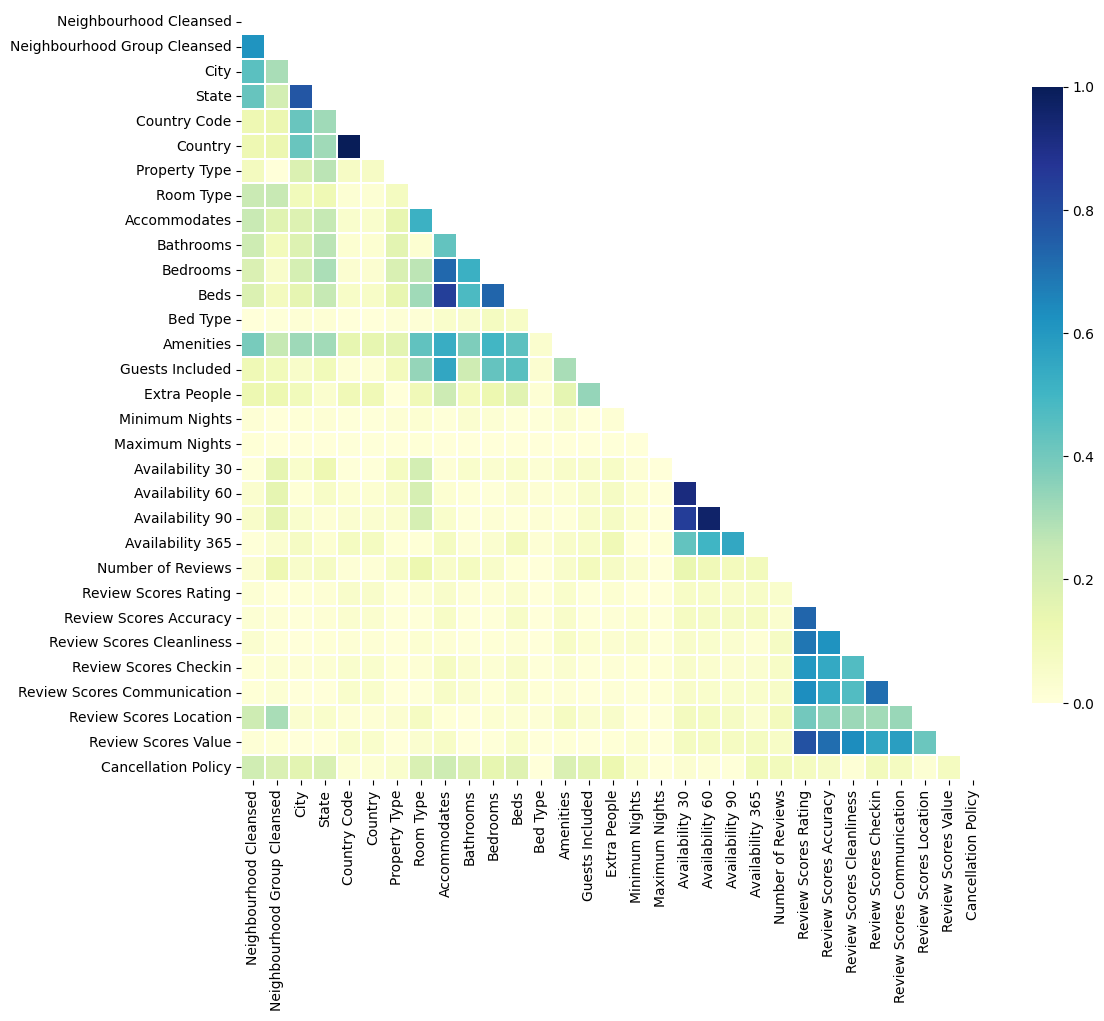

In [67]:
# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Viendo los resultados de la matriz de correlacion yo opinaria que las variables no tienen muchas correlacion entre si, claro esta teniendo en cuenta que las variables directamente relacionadas con la disposicion de la casa/apto tienen cierta relacion con otras que tambien haga referencia a lo mismo (lo mismo aplica para las variables de reviews). De igual manera revisare el scatter matrix para ver si hay alguna relacion un poco mas clara.

Una relacion importante podria ser entre las bedrooms y beds para ver el numero de habitaciones en relacion a cuantas camas distribuyen en estas.



### **4. Generación de nuevas características**

In [69]:
airbnb_data['bed_in_rooms']   = airbnb_data['Bedrooms']/airbnb_data['Beds']

In [75]:
columns = ['price'] + [col for col in airbnb_data.columns if col != 'price']
airbnb_data = airbnb_data.reindex(columns=columns)

print(airbnb_data.head(5).T)

                                       0          1            2            3  \
price                                NaN        NaN          NaN          NaN   
Neighbourhood Cleansed         67.628814  78.547836   107.001729    56.148238   
Neighbourhood Group Cleansed   64.288155  81.380241    86.144444    71.997413   
City                           66.104175  66.104175    67.989304    66.104175   
State                          66.050353  66.050353    64.287546    66.050353   
Country Code                   71.965342  71.965342    71.965342    71.965342   
Country                        71.965342  71.965342    71.965342    71.965342   
Property Type                  72.339303  72.339303    72.339303    72.339303   
Room Type                      95.566872  95.566872    41.196480    95.566872   
Accommodates                    2.000000   4.000000     1.000000     4.000000   
Bathrooms                       1.000000   1.000000     1.000000     1.000000   
Bedrooms                    

### **5. Modelado, cross-validation y estudio de resultados en train y test**

In [39]:
# Carga de datos
airbnb_data = pd.read_csv("./data/airbnb_data_del_train.csv", sep=';', encoding = "latin")

# Imputación
num_columns = airbnb_data.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    mean_value = airbnb_data[col].mean()
    airbnb_data[col].fillna(mean_value, inplace = True)

airbnb_data['Neighbourhood Group Cleansed'].fillna(airbnb_data['Neighbourhood Group Cleansed'].mode()[0], inplace=True)

# Columnas a codificar
categorical_cols = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Country', 'Country Code', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy']  

# TargetEncoder
target_encoder = ce.TargetEncoder(cols=categorical_cols)
airbnb_data[categorical_cols] = target_encoder.fit_transform(airbnb_data[categorical_cols], airbnb_data['Price'])


# Eliminamos las columnas 
airbnb_data.drop(columns= 'Neighbourhood', axis=1, inplace=True)
airbnb_data.drop(columns= 'Square Feet', axis=1, inplace=True)
airbnb_data.drop(columns= 'Weekly Price', axis=1, inplace=True)
airbnb_data.drop(columns= 'Monthly Price', axis=1, inplace=True)
airbnb_data.drop(columns= 'Security Deposit', axis=1, inplace=True)
airbnb_data.drop(columns= 'Cleaning Fee', axis=1, inplace=True)
airbnb_data.drop(columns= 'Zipcode', axis=1, inplace=True)
airbnb_data = airbnb_data[~airbnb_data['State'].isnull()]
airbnb_data = airbnb_data[~airbnb_data['Amenities'].isnull()]
airbnb_data = airbnb_data[~airbnb_data['City'].isnull()]
airbnb_data = airbnb_data[~airbnb_data['Country'].isnull()]

# Generamos características
airbnb_data['bed_in_rooms']   = airbnb_data['Bedrooms']/airbnb_data['Beds']

# Posicionamos price como la primera columna
airbnb_data = airbnb_data[['Price'] + [col for col in airbnb_data.columns if col != 'Price']]


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_20836\3808024176.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data[col].fillna(mean_value, inplace = True)
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_20836\3808024176.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Aplicamos a test.

In [40]:
# Carga de datos
airbnb_data_test = pd.read_csv("./data/airbnb_data_del_test.csv", sep=';', encoding = "latin")

# Imputación
num_columns = airbnb_data_test.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    mean_value = airbnb_data_test[col].mean()
    airbnb_data_test[col].fillna(mean_value, inplace = True)

airbnb_data_test['Neighbourhood Group Cleansed'].fillna(airbnb_data_test['Neighbourhood Group Cleansed'].mode()[0], inplace=True)

# Columnas a codificar
categorical_cols = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Country', 'Country Code', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy']  

# TargetEncoder
target_encoder = ce.TargetEncoder(cols=categorical_cols)
airbnb_data_test[categorical_cols] = target_encoder.fit_transform(airbnb_data_test[categorical_cols], airbnb_data_test['Price'])


# Eliminamos las columnas 
airbnb_data_test.drop(columns= 'Neighbourhood', axis=1, inplace=True)
airbnb_data_test.drop(columns= 'Square Feet', axis=1, inplace=True)
airbnb_data_test.drop(columns= 'Weekly Price', axis=1, inplace=True)
airbnb_data_test.drop(columns= 'Monthly Price', axis=1, inplace=True)
airbnb_data_test.drop(columns= 'Security Deposit', axis=1, inplace=True)
airbnb_data_test.drop(columns= 'Cleaning Fee', axis=1, inplace=True)
airbnb_data_test.drop(columns= 'Zipcode', axis=1, inplace=True)
airbnb_data_test = airbnb_data_test[~airbnb_data_test['State'].isnull()]
airbnb_data_test = airbnb_data_test[~airbnb_data_test['Amenities'].isnull()]
airbnb_data_test = airbnb_data_test[~airbnb_data_test['City'].isnull()]
airbnb_data_test = airbnb_data_test[~airbnb_data_test['Country'].isnull()]

# Generamos características
airbnb_data_test['bed_in_rooms']   = airbnb_data_test['Bedrooms']/airbnb_data_test['Beds']

# Posicionamos price como la primera columna
airbnb_data_test = airbnb_data_test[['Price'] + [col for col in airbnb_data.columns if col != 'Price']]

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_20836\1267319655.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data_test[col].fillna(mean_value, inplace = True)
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_20836\1267319655.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [41]:
airbnb_data_test.head(10).T


,0,1,2,3,4,5,6,7,8,9
Price,120.000000,52.000000,38.000000,60.000000,50.000000,145.000000,25.000000,80.000000,65.000000,16.000000
Neighbourhood Cleansed,102.684515,75.887805,71.490684,71.490684,69.712375,92.018849,60.905292,66.679381,75.887805,50.285117
Neighbourhood Group Cleansed,81.170727,81.351023,81.351023,81.351023,81.351023,81.351023,81.351023,46.669060,81.351023,45.942567
City,65.212942,65.212942,65.212942,65.212942,65.212942,65.212942,65.212942,65.212942,65.212942,65.212942
State,71.150754,64.058074,64.058074,64.058074,64.058074,64.058074,64.058074,64.058074,64.058074,64.058074
Country Code,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986
Country,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986,69.711986
Property Type,71.059509,71.059509,71.059509,71.059509,71.059509,71.059509,71.059509,71.059509,71.059509,71.059509
Room Type,93.610590,37.878623,37.878623,93.610590,93.610590,93.610590,37.878623,93.610590,93.610590,37.878623
Accommodates,5.000000,2.000000,1.000000,2.000000,4.000000,6.000000,1.000000,6.000000,2.000000,1.000000


In [43]:
airbnb_data.head(5).T

,0,1,2,3,4
Price,70.000000,80.000000,28.000000,60.000000,120.000000
Neighbourhood Cleansed,67.628814,78.547836,107.001729,56.148238,108.884163
Neighbourhood Group Cleansed,64.288155,81.380241,86.144444,71.997413,81.380241
City,66.104175,66.104175,67.989304,66.104175,125.182875
State,66.050353,66.050353,64.287546,66.050353,119.782688
Country Code,71.965342,71.965342,71.965342,71.965342,123.133874
Country,71.965342,71.965342,71.965342,71.965342,123.133874
Property Type,72.339303,72.339303,72.339303,72.339303,99.218349
Room Type,95.566872,95.566872,41.196480,95.566872,41.196480
Accommodates,2.000000,4.000000,1.000000,4.000000,1.000000


Preparamos los datos para sklearn

In [44]:
from sklearn import preprocessing

# Dataset de train
data_train = airbnb_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = airbnb_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto


In [45]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [46]:
print("train", XtrainScaled.shape)
print("test", XtestScaled.shape)

train (11810, 32)
test (2953, 32)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.12689610031679222; total time=   0.0s
[CV] END ..........................alpha=0.12689610031679222; total time=   0.0s
[CV] END ..........................alpha=0.12689610031679222; total time=   0.0s
[CV] END ..........................alpha=0.16102620275609392; total time=   0.0s
[CV] END ..........................alpha=0.16102620275609392; total time=   0.0s
[CV] END ..........................alpha=0.16102620275609392; total time=   0.0s
[CV] END ..........................alpha=0.20433597178569418; total time=   0.0s
[CV] END ..........................alpha=0.20433597178569418; total time=   0.0s
[CV] END ..........................alpha=0.20433

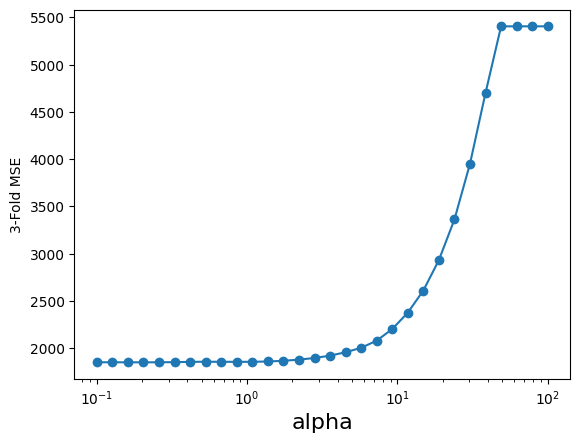

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,2,30) # utilice los valores de 10^-1 a 10^2 para una mejor visualizacion 
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnb_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.79e+03
MSE Modelo Lasso (test) : 1.41e+03
RMSE Modelo Lasso (train): 42.3
RMSE Modelo Lasso (test) : 37.5
Neighbourhood Cleansed 8.47107717642246
Neighbourhood Group Cleansed 0.0
City 15.280342579446526
State -3.6266297256756688
Country Code 9.090132794689437
Country 1.7481396892671863e-14
Property Type 0.0
Room Type 13.032674697674826
Accommodates 10.401283765522079
Bathrooms 10.1353332699271
Bedrooms 15.14871762970257
Beds -4.615300283623092
Bed Type 0.22173853016880798
Amenities 27.239386475158813
Guests Included 0.0
Extra People 0.2875369465083418
Minimum Nights 0.0
Maximum Nights -0.0
Availability 30 5.1281750677684625
Availability 60 0.0
Availability 90 -0.0
Availability 365 0.11584290048832475
Number of Reviews -2.4076717779032686
Review Scores Rating 2.714004396456413
Review Scores Accuracy 0.6889192009231604
Review Scores Cleanliness 1.402264060516171
Review Scores Checkin -0.35034729641696605
Review Scores Communication -0.3853845022375
Review Scor

#### **Conclusiones**

Podemos ver la influencia que el modelo lasso le da a cada variable por ahora nos podemos quedar con que:

- **Property Type**, **Guests Included**, **Minimum Nights**, **Maximum Nights**: Estas tienen poca relevancia a la hora de calcular el precio del airbnb ya que su valor es de **(0.0)**

- **Amenities**, **Bedrooms**, **City**: Son variables de gran importancia para el modelo ya que tienen un coeficiente positivo y alto lo que significa que impactan de manera directa al precio (cuando estas varian o aumentan tambien lo hace el precio) **(27.23)** - **(15.14)** - **(15.28)**

- **Beds**, **bed_in_rooms**: Aqui hay una situacion interesante ya que el modelo plantea que a medida hay mas camas el precio ba bajando ya que su coeficiente es negativo **(-4.61)** y la variable bed_in_rooms **(-2.93)**parece indicar lo mismo que entre mas camas hay por habitacion el precio baja. Esto se puede deber a que intentan acomodar una mayor de personas sin necesariamente tener una area mas grande (pero carecemos de la informacion de area del apto/casa).

#### **Metodo 2 Random Forest**

Fitting 5 folds for each of 19 candidates, totalling 95 fits


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.6s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.6s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.6s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.6s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.6s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.9s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.9s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.1s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.1s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.1s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.1s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.1s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.5s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.7s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=15; total time=   1.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=15; total time=   1.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=15; total time=   1.9s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=15; total time=   1.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=15; total time=   1.8s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=16; total time=   2.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=16; total time=   2.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=16; total time=   2.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=16; total time=   2.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=16; total time=   2.0s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=17; total time=   2.1s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=17; total time=   2.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=17; total time=   2.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=17; total time=   2.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=17; total time=   2.2s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=18; total time=   2.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=18; total time=   2.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=18; total time=   2.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=18; total time=   2.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=18; total time=   2.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=19; total time=   2.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=19; total time=   2.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=19; total time=   2.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=19; total time=   2.4s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=19; total time=   2.3s


c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


best mean cross-validation score: 0.859
best parameters: {'max_depth': 15}


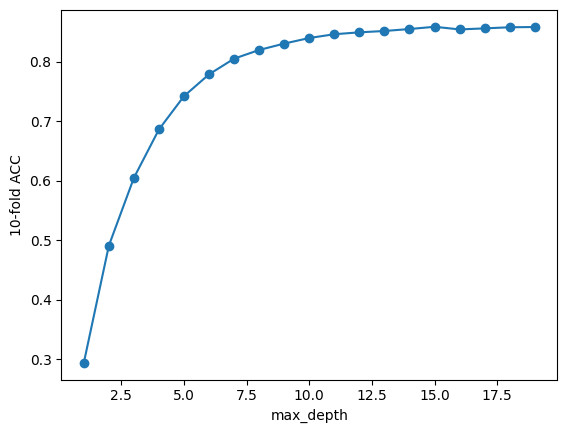

In [50]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) # Se aumentan los Cross Validation Folds para tener una mayor precision y certeza de la funcionalidad del modelo
grid.fit(X_train, y_train)                                                                                                                       

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [51]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

c:\Users\Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train:  0.9716092388844827
Test:  0.8484591603913033


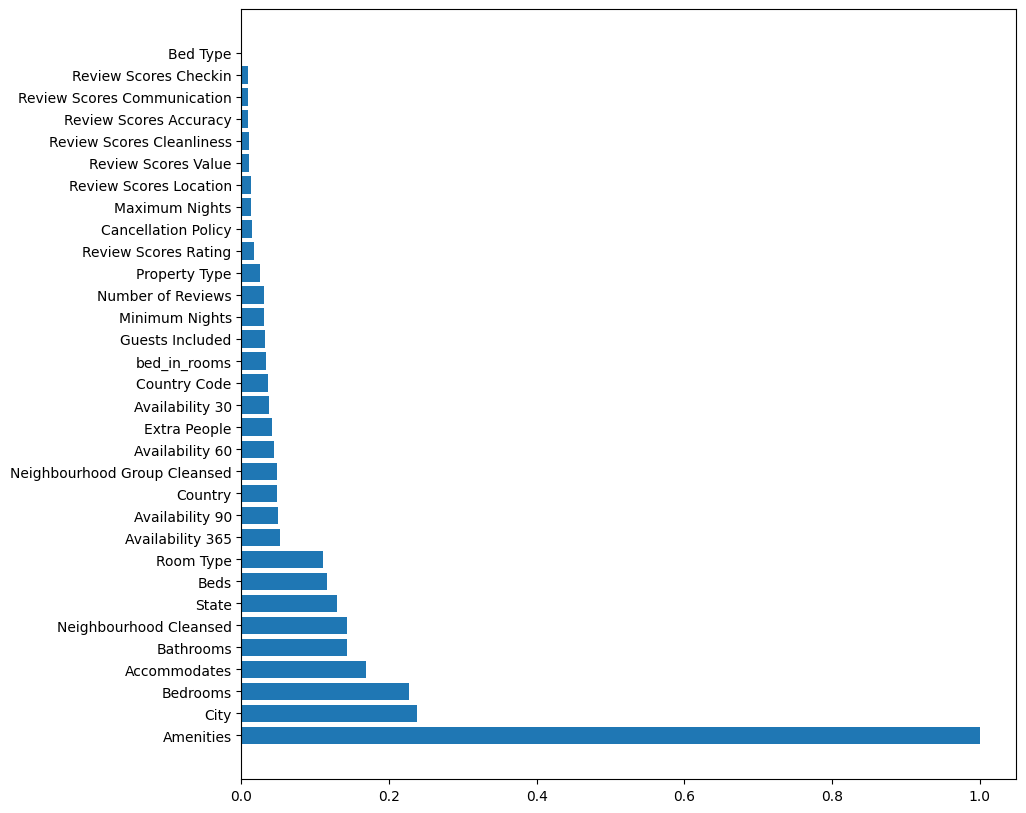

In [52]:
importances_rf = randomForest.feature_importances_
importances_rf = importances_rf / np.max(importances_rf)

indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances_rf[indices_rf])
plt.yticks(range(X_train.shape[1]),feature_names[indices_rf])
plt.show()

#### **Conclusiones Finales**

***Lasso*** y ***RandomForest*** 

- Podemos ver que ambos modelos le dieron la mayor importancia a las mismas variables:
    - Amenities
    - City
    - Bedrooms

Por lo cual se podria estimar que estas variables son las que mas afectan en un aspecto general al precio

- Por otro lado se ve que el rendimiento de RandomForest dio mejores resultados generales teniendo unos puntajes de **(0.97)** en ***train*** y **(0.84)** en ***test***.

- El analisis inicial dio buenos resultados pero para futuros analisis con la informacion conseguida se pudieron eliminar algunas variables que demsotraron no tener valor alguno o afectar la variable objetivo(precio) de ninguna manera. A su vez la unformacion adquirida por parte del dataset pudo ser mejor ya que faltaron variables por falta de datos como el area del apartemento/casa etc...

- Otro ejercicio seria  utilizar mas modelos para apreciar sus diferencia con respecto a RandomForest que fue el que genero mejores resultados.